In [1]:
from src import Pipeline, Plotter
from src.utils.read import load_data
import numpy as np
import pandas as pd

In [2]:
X, ids = load_data('spleen')
pipe = Pipeline(X, config="configs/config.ini", col_ids=ids)
plotter = Plotter(pipe)
pipe.run(clu_method='KMeans')

INFO:PCA: Initializing PCA.
INFO:PCA: Knee found at 15.
INFO:KMeans: Initializing KMeans.
INFO:Cluster.Multiple: Running multiple threads with n_jobs=-1.
INFO:Cluster.Multiple: Finished clustering with k=3. Score=0.34.
INFO:Cluster.Multiple: Finished clustering with k=4. Score=0.27.
INFO:Cluster.Multiple: Finished clustering. Best score achieved for k=3.
INFO:TTest: Using 200 markers.
INFO:TTest: Finished finding markers for cluster=0.
INFO:TTest: Finished finding markers for cluster=1.
INFO:TTest: Finished finding markers for cluster=2.
INFO:HyperGeom: Finished finding lvl1 types.
INFO:HyperGeom: Finished finding lvl2 types.


INFO:UMAP: Initializing UMAP.


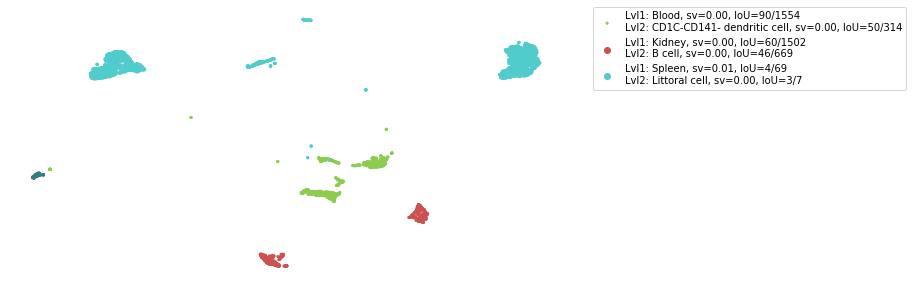

In [8]:
plotter.plot_clu()

In [3]:
new_labels = pipe.labels

In [5]:
new_labels[:1000] = 3

In [6]:
_ = pipe.update(new_labels=new_labels, method="ConstrainedKMeans", saved_clusters=np.array([0, 1]))

[3 3 3 ... 0 2 2]
[1 1 1 ... 0 1 1]


In [7]:
_ = pipe.get_markers()
_ = pipe.convert()
_ = pipe.identify()

INFO:TTest: Using 200 markers.
INFO:TTest: Finished finding markers for cluster=0.
INFO:TTest: Finished finding markers for cluster=1.
INFO:TTest: Finished finding markers for cluster=2.
INFO:TTest: Finished finding markers for cluster=3.
INFO:HyperGeom: Finished finding lvl1 types.
INFO:HyperGeom: Finished finding lvl2 types.
